In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.core.arrays import categorical
import seaborn as sns

plt.rcParams['figure.figsize'] = (8,6)
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

#Fetching data
""" 
    Download data from kaggle using this link
"""

loan = pd.read_csv("Train_Loan_Home.csv")
print(loan.head())

# Load test data
loan_test = pd.read_csv("Test_Loan_Home.csv")

"""
    Understanding Data
"""

# data_shape = loan.shape,loan_test.shape
data_info = loan.describe()
test_info = loan_test.info()
# data_types = loan.dtypes,loan_test.dtypes
# missing_data = loan.isnull().sum(), loan_test.isnull().sum()
# data_info
data_info
# test_info

data_info.to_excel("info.xlsx") 

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

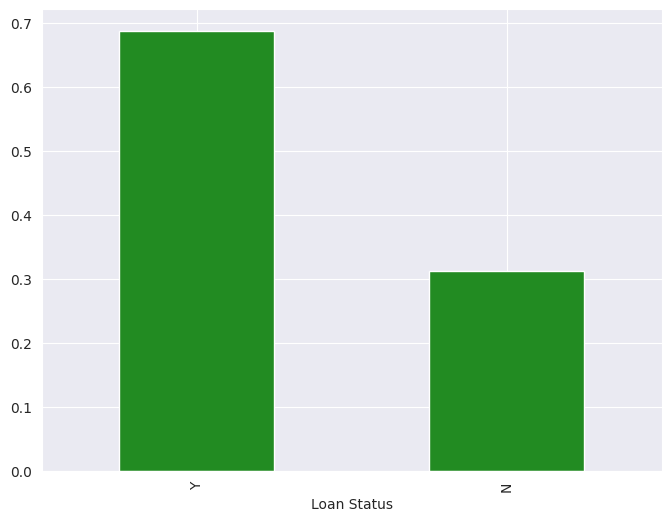

In [2]:

"""
    Exploratory Data Analysis
"""

#dropping the unnecessary column
# loan_mcdm_id = loan['Loan_ID']
loan.drop('Loan_ID', axis=1, inplace=True)
loan_test_id = loan_test['Loan_ID']
loan_mcdm_id = loan_test['Loan_ID']
loan_test.drop('Loan_ID', axis=1, inplace=True)

X = loan.drop('Loan_Status', axis=1)
y = loan['Loan_Status']


"""
    Categorizing datatypes
"""
categorical_features = []
numerical_features = []
for i in X.columns.tolist():
    if X[i].dtype=='object':
        categorical_features.append(i)
    else:
        numerical_features.append(i)

# print(categorical_features)
# print(numerical_features)

""" 
    Univariate Analysis
"""
loan_counts = loan["Loan_Status"].value_counts()
# print(loan_counts)

loan['Loan_Status'].value_counts(normalize=True).plot(kind='bar', color='forestgreen')
plt.xlabel('Loan Status')
plt.show()

Features:  Gender
Male      0.813644
Female    0.186356
Name: Gender, dtype: float64


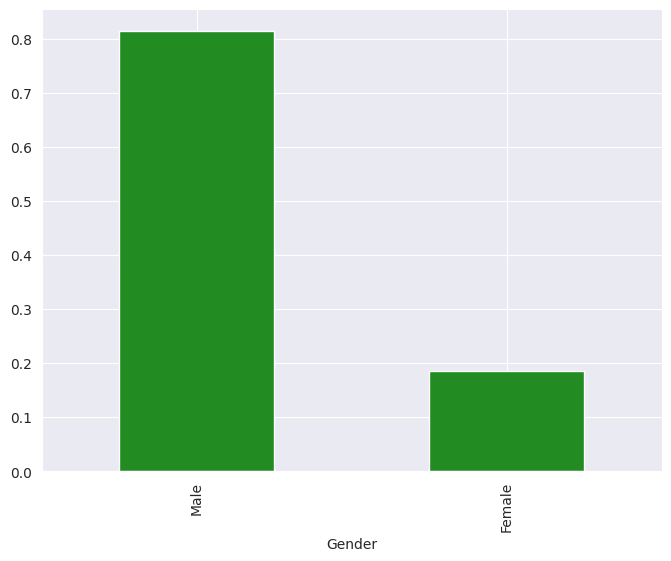



Features:  Married
Yes    0.651391
No     0.348609
Name: Married, dtype: float64


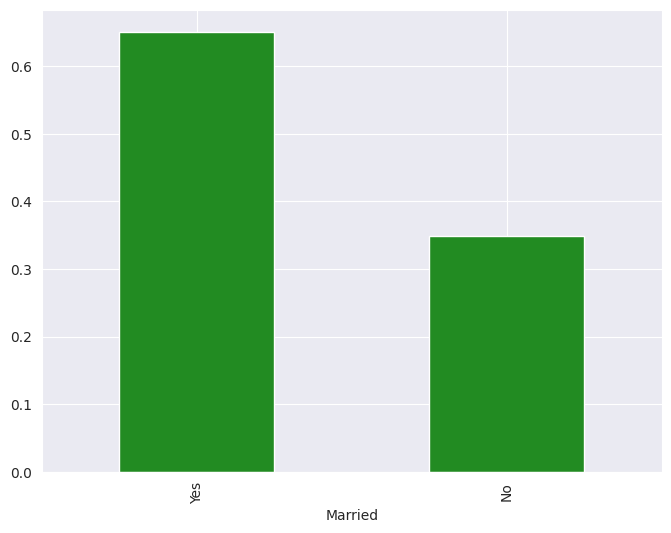



Features:  Dependents
0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64


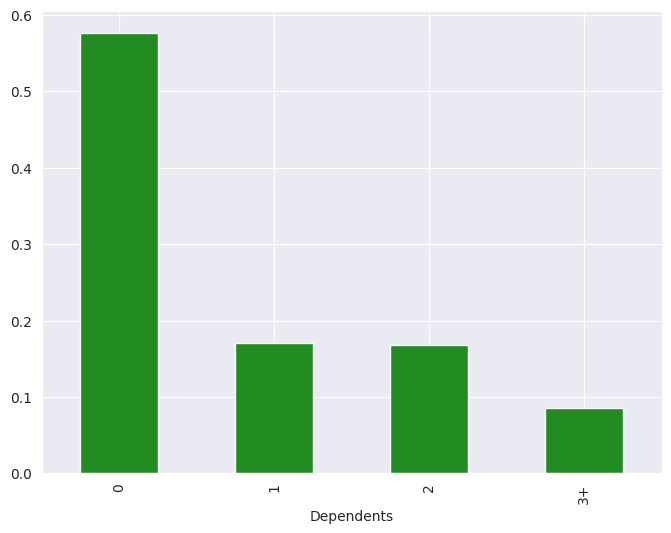



Features:  Education
Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64


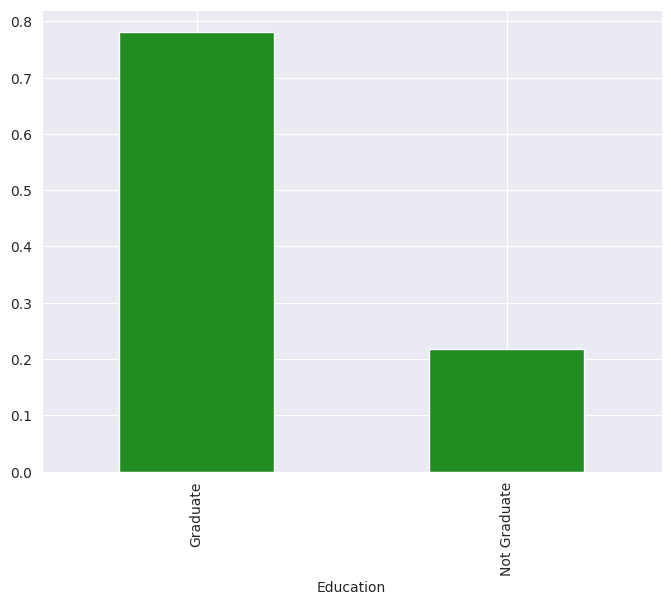



Features:  Self_Employed
No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64


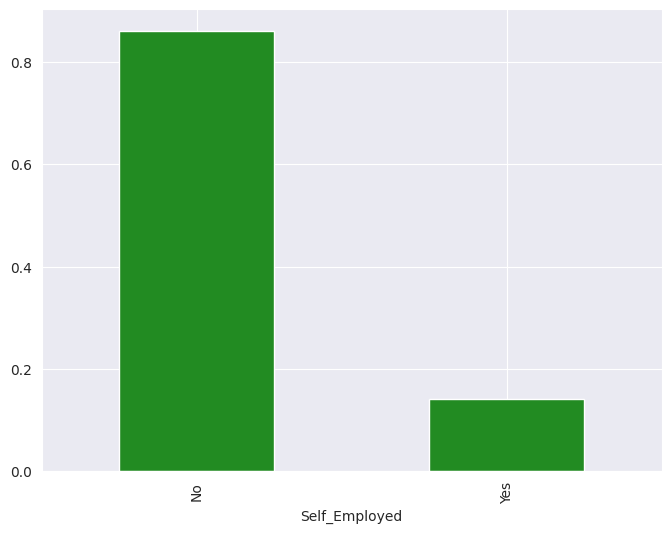



Features:  Property_Area
Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64


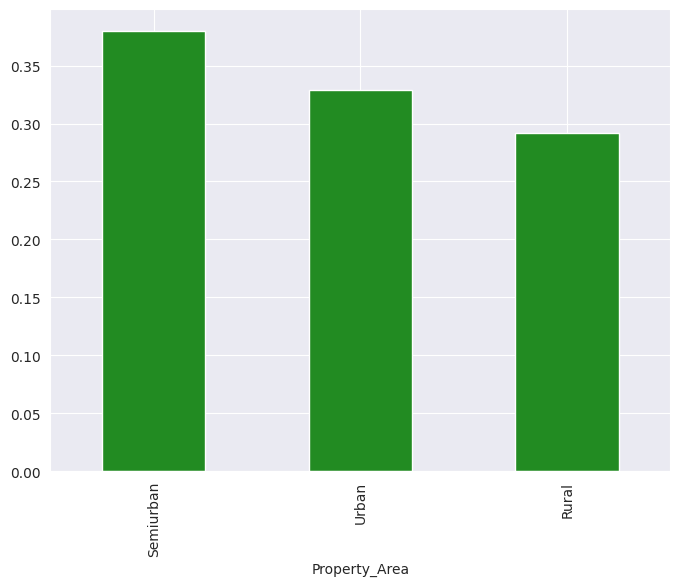

In [3]:
for i in categorical_features:
    print('Features: ', i)
    print(X[i].value_counts(normalize=True))
    X[i].value_counts(normalize=True).plot(kind='bar',color='forestgreen')
    plt.xlabel(i)
    plt.savefig(i,dpi=300, bbox_inches='tight')
    plt.show()
    print('\n')

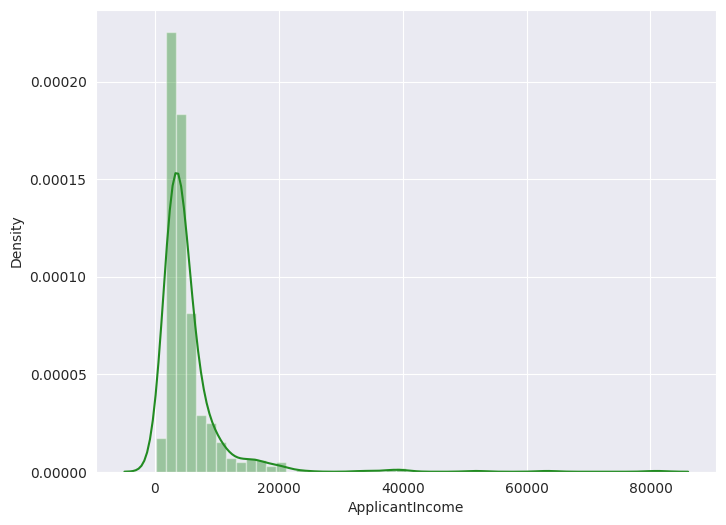

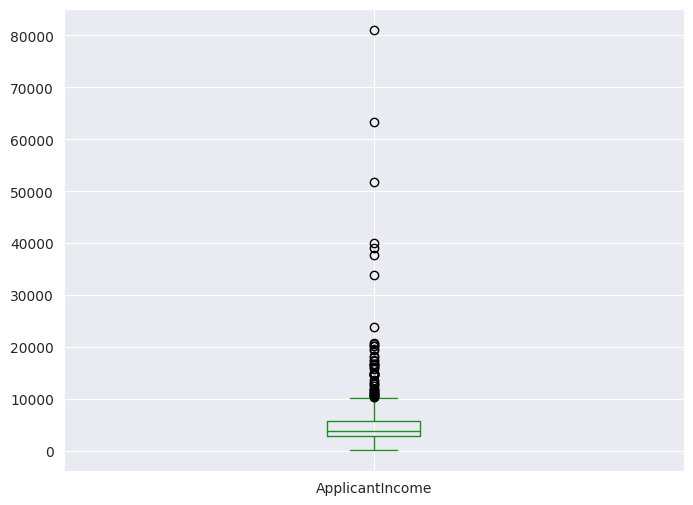

In [4]:
#Numerical Features
sns.distplot(X['ApplicantIncome'], bins=50, kde=True,color='forestgreen')
plt.show()
X['ApplicantIncome'].plot(kind='box', color='forestgreen')
plt.show()

From the above visualization it can be inferred that:

1. The Applicant Income Feature does not follow normal distribution, Most of the Income ranges from 0-20,000

2. The boxplot surely indicates that the feature is having many Outliers. It is due to different income labels of different customers. We can group the income of the customers with their education label

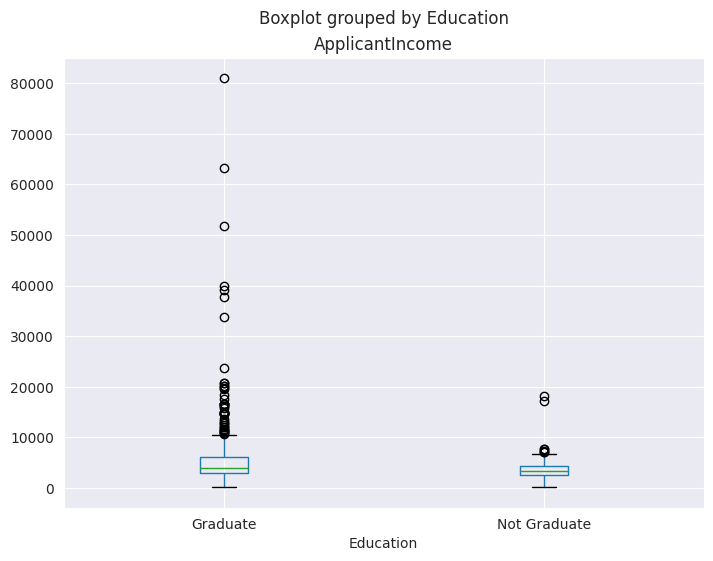

In [5]:
X.boxplot(column='ApplicantIncome',by='Education')
plt.show()

Most of the Customers who are graduate is having very high incomes

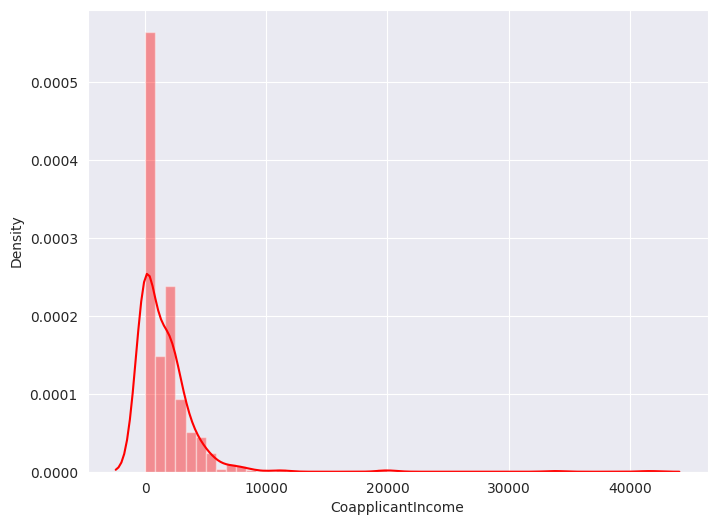

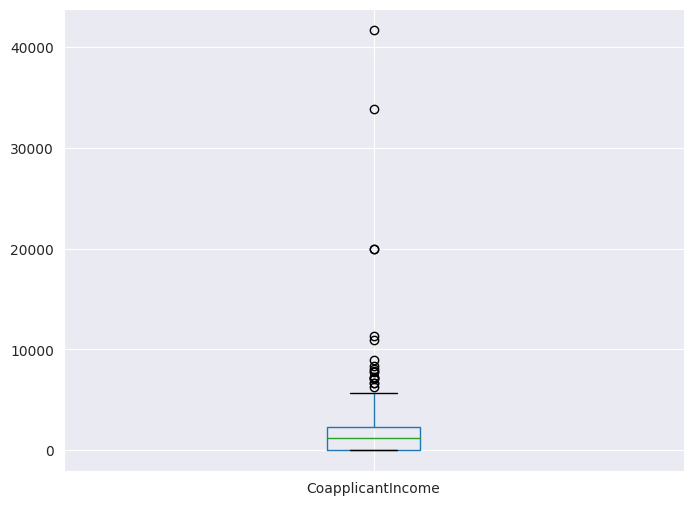

In [6]:
sns.distplot(X['CoapplicantIncome'],kde=True, color='red')
plt.show()
X.boxplot(column='CoapplicantIncome')
plt.show()

1. This feature is having a Right Skewed Distribution and most of the CoapplicantIncome ranges from 0-6000
2. Also the feature is having few outliers

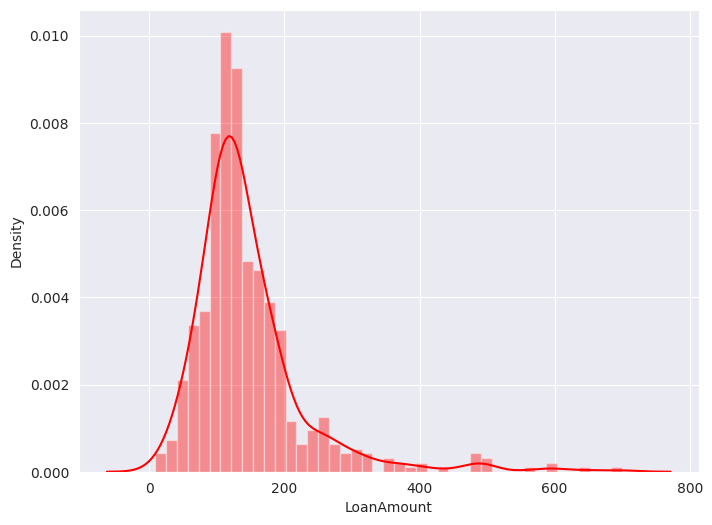

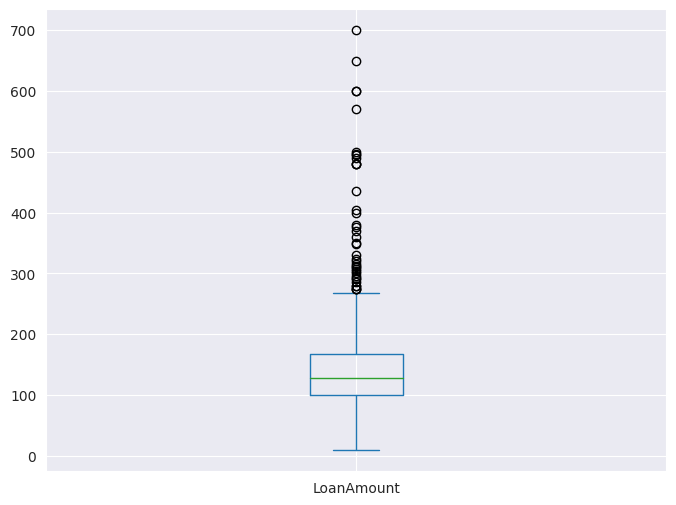

In [7]:
sns.distplot(X['LoanAmount'], kde=True, color='red')
plt.show()
X['LoanAmount'].plot(kind='box')
plt.show()

LoanAmount feature follows Normal Distribution but it is having many Outliers

The features Loan_Amount_Term and Credit_History are having categorical values, so we will consider them in the categorical features list

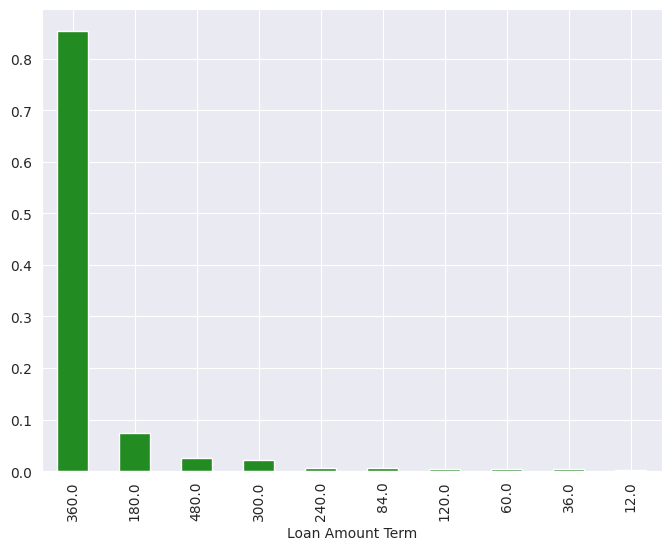

In [8]:
X['Loan_Amount_Term'].value_counts(normalize=True).plot(kind='bar', color='forestgreen')
plt.xlabel('Loan Amount Term')
plt.show()

Around 85% loans are having 360 as their loan amount term

Bivariate Analysis

Loan_Status         N         Y
Gender                         
Female       0.330357  0.669643
Male         0.306748  0.693252


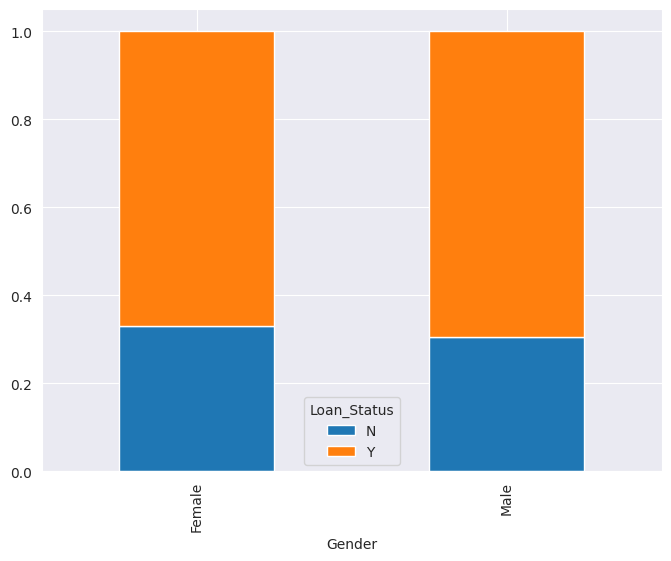

Loan_Status         N         Y
Married                        
No           0.370892  0.629108
Yes          0.283920  0.716080


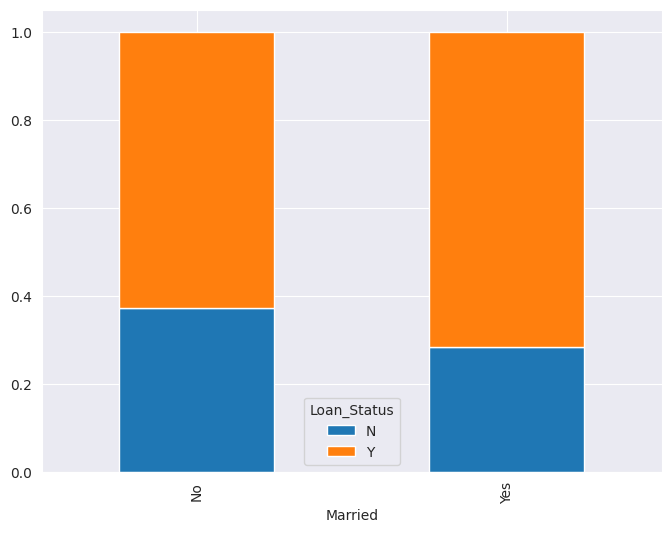

Loan_Status         N         Y
Dependents                     
0            0.310145  0.689855
1            0.352941  0.647059
2            0.247525  0.752475
3+           0.352941  0.647059


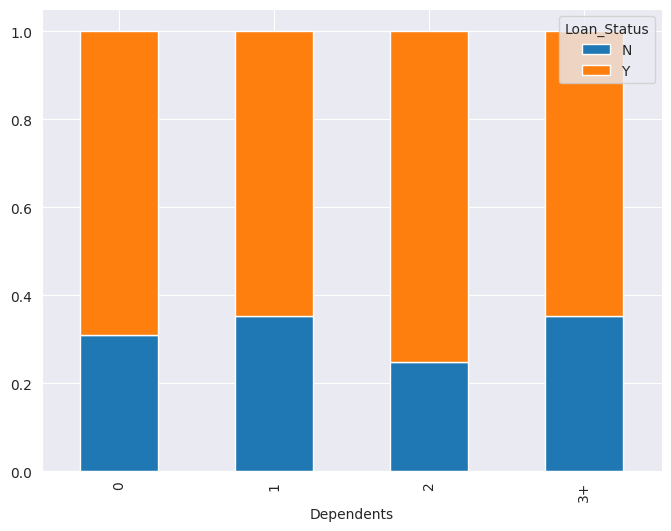

Loan_Status          N         Y
Education                       
Graduate      0.291667  0.708333
Not Graduate  0.388060  0.611940


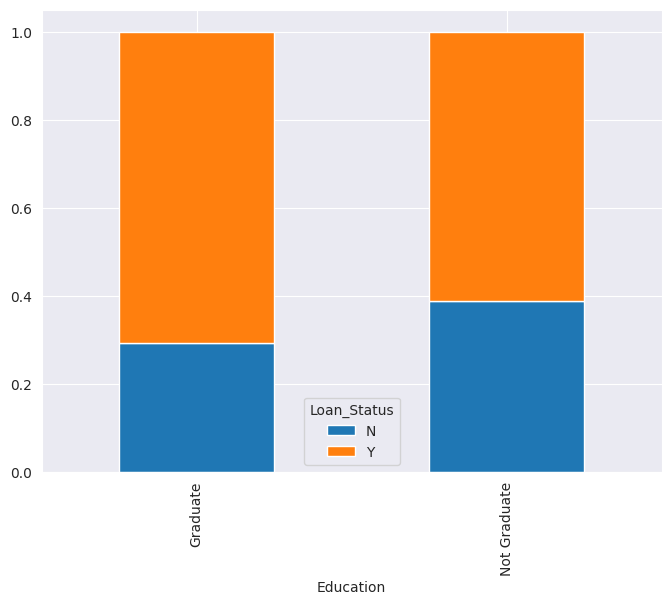

Loan_Status           N         Y
Self_Employed                    
No             0.314000  0.686000
Yes            0.317073  0.682927


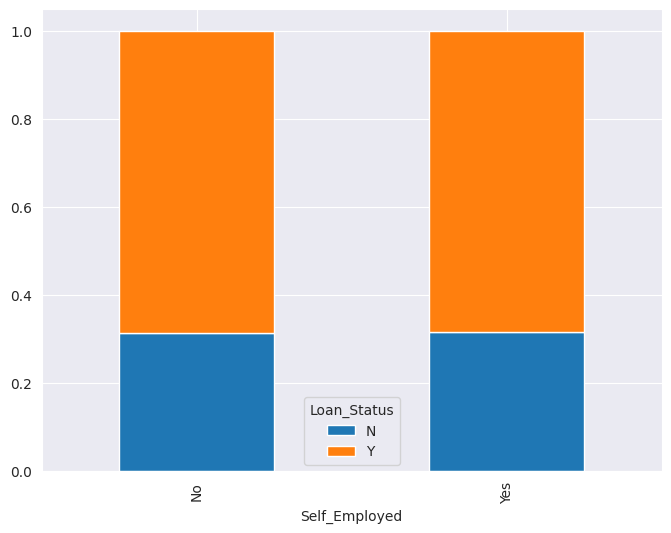

Loan_Status           N         Y
Property_Area                    
Rural          0.385475  0.614525
Semiurban      0.231760  0.768240
Urban          0.341584  0.658416


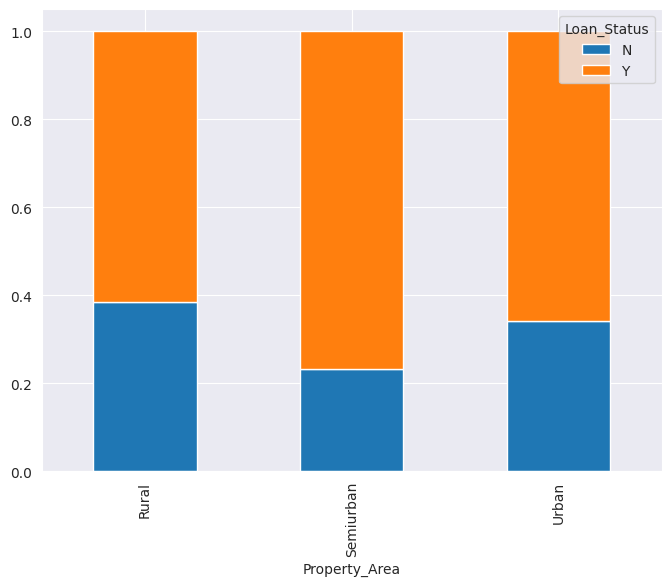

Loan_Status            N         Y
Credit_History                    
0.0             0.921348  0.078652
1.0             0.204211  0.795789


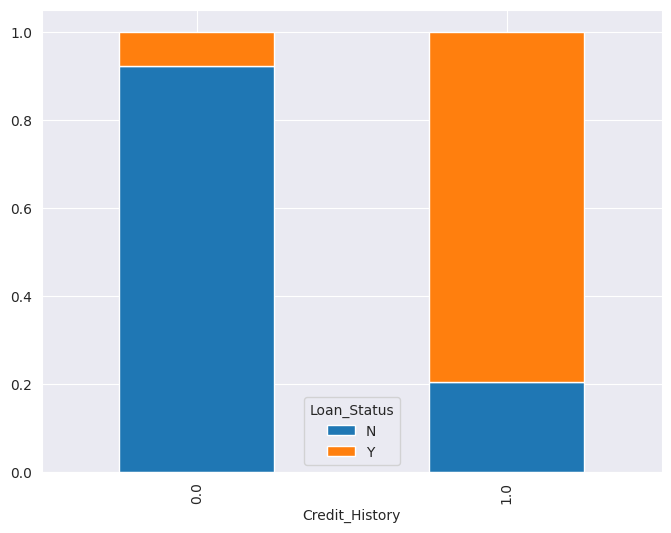

In [9]:
gender = pd.crosstab(loan['Gender'], loan['Loan_Status'])
Gender = gender.div(gender.sum(axis=1), axis=0)
print(Gender)
Gender.plot(kind='bar', stacked=True)
plt.show()

married = pd.crosstab(loan['Married'], loan['Loan_Status'])
Married = married.div(married.sum(axis=1), axis=0)
print(Married)
Married.plot(kind='bar', stacked=True)
plt.show()

dependents = pd.crosstab(loan['Dependents'],loan['Loan_Status'])
Dependents = dependents.div(dependents.sum(axis=1),axis=0)
print(Dependents)
Dependents.plot(kind='bar',stacked=True)
plt.show()

education =  pd.crosstab(loan['Education'],loan['Loan_Status'])
Education = education.div(education.sum(axis=1),axis=0)
print(Education)
Education.plot(kind='bar',stacked=True)
plt.show()

self_employed = pd.crosstab(loan['Self_Employed'],loan['Loan_Status'])
Self_employed = self_employed.div(self_employed.sum(axis=1),axis=0)
print(Self_employed)
Self_employed.plot(kind='bar',stacked=True)
plt.show()

property_area = pd.crosstab(loan['Property_Area'],loan['Loan_Status'])
Property_area = property_area.div(property_area.sum(axis=1),axis=0)
print(Property_area)
Property_area.plot(kind='bar',stacked=True)
plt.show()

credit_history = pd.crosstab(loan['Credit_History'],loan['Loan_Status'])
Credit_history = credit_history.div(credit_history.sum(axis=1),axis=0)
print(Credit_history)
Credit_history.plot(kind='bar',stacked=True)
plt.show()

Handling Missing Values
Columns having values greater than zero indicates the value count for the mixing values.

In [10]:
print("Missing Vales:" ,'\n',loan.isnull().sum())
Missing = loan.isnull().sum()
Missing.to_excel("missing.xlsx") 

Missing Vales: 
 Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [11]:
X["Gender"].replace(np.nan, X['Gender'].mode()[0], inplace=True)
X['Married'].replace(np.nan,X['Married'].mode()[0], inplace=True)
X['Dependents'].replace(np.nan,X['Dependents'].mode()[0], inplace=True)
X['Self_Employed'].replace(np.nan,X['Self_Employed'].mode()[0],inplace=True)
X['Loan_Amount_Term'].replace(np.nan,X['Loan_Amount_Term'].mode()[0], inplace=True)
X['Credit_History'].replace(np.nan,X['Credit_History'].mode()[0], inplace=True)
X['LoanAmount'].replace(np.nan, X['LoanAmount'].median(), inplace=True)

As the Loan Amount feature has many outliers, we will replace the null values with median

In [12]:
X['LoanAmount'].replace(np.nan, X['LoanAmount'].median(), inplace=True)

Data Description: 
    The table below gives description of our data considering :
    1. mean, 
    2. std= standard deviation
    3. min = Minimum value
    4. 25% = first percentile
    5. 50% = second percentile
    6. 75% = third percentile
    7. max = maximum value

In [13]:
data_info = X.describe()
data_info

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Verify if we still have missing values in the dataset

In [14]:
X.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

All the null values has been removed

Feature Engineering 
Convecting all the categorical variables into numerical variables

In [15]:
from sklearn.preprocessing import LabelEncoder
import numpy as np 

categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area','Loan_Amount_Term','Credit_History']
le = LabelEncoder()
for i in categorical_features:
    X[i] = le.fit_transform(X[i])

In [16]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,8,1,2
1,1,1,1,0,0,4583,1508.0,128.0,8,1,0
2,1,1,0,0,1,3000,0.0,66.0,8,1,2
3,1,1,0,1,0,2583,2358.0,120.0,8,1,2
4,1,0,0,0,0,6000,0.0,141.0,8,1,2


     Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No          0      Graduate            No             5849   
1      Male     Yes          1      Graduate            No             4583   
2      Male     Yes          0      Graduate           Yes             3000   
3      Male     Yes          0  Not Graduate            No             2583   
4      Male      No          0      Graduate            No             6000   
..      ...     ...        ...           ...           ...              ...   
609  Female      No          0      Graduate            No             2900   
610    Male     Yes         3+      Graduate            No             4106   
611    Male     Yes          1      Graduate            No             8072   
612    Male     Yes          2      Graduate            No             7583   
613  Female      No          0      Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

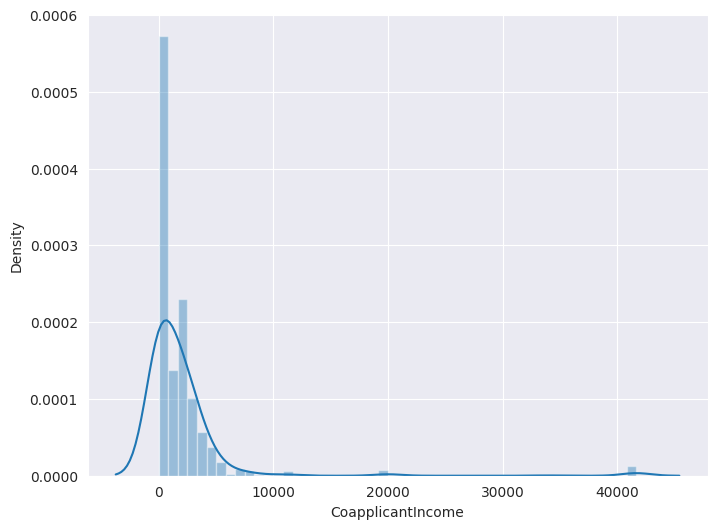

In [17]:
from imblearn.over_sampling import RandomOverSampler

ros  = RandomOverSampler(random_state=42)
X,y = ros.fit_resample(X,y)
print(loan)
sns.distplot(X['CoapplicantIncome'],bins=50)
plt.show()

Feature Selection

Correlation Matrix

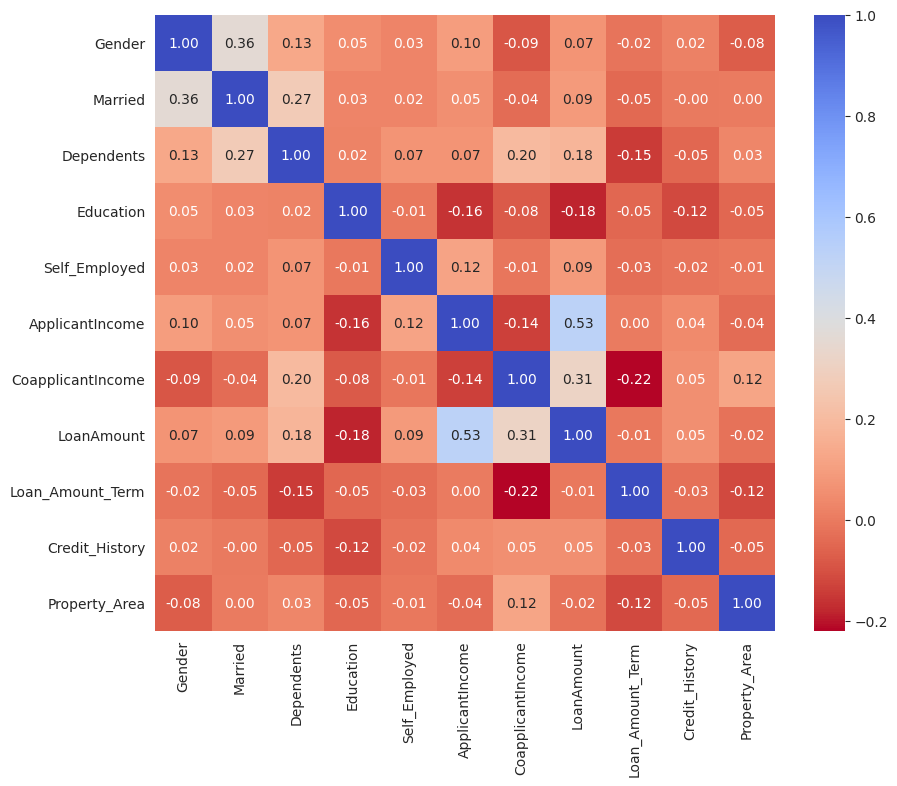

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(X.corr(), annot=True, fmt='.2f', cmap='coolwarm_r')
plt.show()

Imbalance Data Resampling

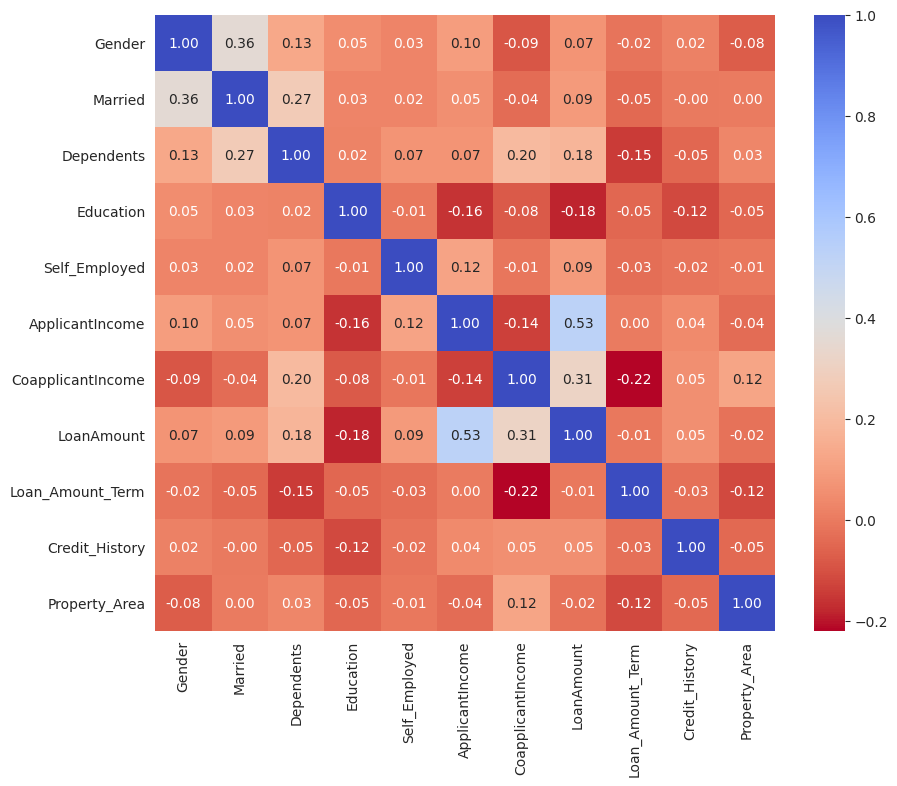

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(X.corr(), annot=True, fmt='.2f', cmap='coolwarm_r')
plt.savefig('Corrolation Map2.png', dpi=300, bbox_inches='tight')
plt.show()

In [20]:
# color variations: 'Red' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

Feature Importance

In [21]:
from sklearn.ensemble import ExtraTreesClassifier


etc = ExtraTreesClassifier(n_estimators=90)
etc.fit(X,y)
values=pd.Series(etc.feature_importances_) 
criterial = X.columns
model_weight = values

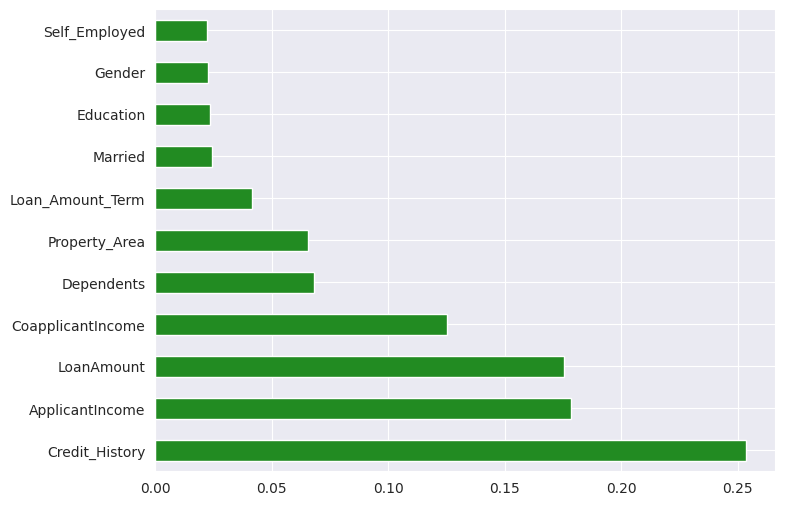

In [22]:
values.index=X.columns
values.sort_values(ascending=False).plot(kind='barh', color='forestgreen')
plt.savefig('Feature Importances.png', dpi=300, bbox_inches='tight')
plt.show()

Data Normalization

In [23]:
from sklearn.preprocessing import StandardScaler

X_norm = StandardScaler().fit_transform(X)
X_norm[0:5]
# Converts n-d numpy array into dataframe 
Standard_scaler = pd.DataFrame(X_norm)
# Standard_scaler.head()
X.to_excel("StandardScalerBefore.xlsx") 
Standard_scaler.to_excel("StandardScaler.xlsx") 

Model Creation
The following steps to be followed:
    1. Apply all the changes in test dataset
    2. Separate the training dataset into train data and validation data
    3. Apply different Machine Learning Classification Algorithm to train the dataset
    4. Check the performance matrix based on the output of the Validation dataset
    5. Apply the best Model into the test data

Applying all the changes in the Test dataset

In [24]:
loan_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncomeMonthly,CoapplicantIncomeMonthly,LoanAmountThousands,Loan_Amount_Term_Months,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


ApplicantIncomeMonthly,CoapplicantIncomeMonthly,LoanAmountThousands,Loan_Amount_Term_Months these four features are not having the same name in the training data. So renaming the features with the same name in the training dataset

In [25]:
loan_test.rename(columns={'ApplicantIncomeMonthly':'ApplicantIncome','CoapplicantIncomeMonthly':'CoapplicantIncome','LoanAmountThousands':'LoanAmount','Loan_Amount_Term_Months':'Loan_Amount_Term'},inplace=True)

In [26]:
loan_test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [27]:
loan_test['Gender'].replace(np.nan,loan_test['Gender'].mode()[0],inplace=True)
loan_test['Dependents'].replace(np.nan,loan_test['Dependents'].mode()[0],inplace=True)
loan_test['Self_Employed'].replace(np.nan,loan_test['Self_Employed'].mode()[0],inplace=True)
loan_test['LoanAmount'].replace(np.nan,loan_test['LoanAmount'].median(),inplace=True)
loan_test['Loan_Amount_Term'].replace(np.nan,loan_test['Loan_Amount_Term'].mode()[0],inplace=True)
loan_test['Credit_History'].replace(np.nan,loan_test['Credit_History'].mode()[0],inplace=True)

In [28]:
loan_test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [29]:
for i in categorical_features:
    loan_test[i]=LabelEncoder().fit_transform(loan_test[i])
loan_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,10,1,2
1,1,1,1,0,0,3076,1500,126.0,10,1,2
2,1,1,2,0,0,5000,1800,208.0,10,1,2
3,1,1,2,0,0,2340,2546,100.0,10,1,2
4,1,0,0,1,0,3276,0,78.0,10,1,2


In [30]:
# loan_test['LoanAmount_log']=np.log(loan_test['LoanAmount'])
# loan_test.drop('LoanAmount',axis=1,inplace=True)
# loan_test.head()

In [31]:
loan_test_norm=StandardScaler().fit_transform(loan_test)
loan_test_norm[0:5]

array([[ 0.48547939,  0.75835829, -0.75822199, -0.5448117 , -0.33484506,
         0.1864605 , -0.67333511, -0.42677996,  0.30677633,  0.4376739 ,
         1.11876379],
       [ 0.48547939,  0.75835829,  0.18187082, -0.5448117 , -0.33484506,
        -0.35269225, -0.02984821, -0.16395333,  0.30677633,  0.4376739 ,
         1.11876379],
       [ 0.48547939,  0.75835829,  1.12196363, -0.5448117 , -0.33484506,
         0.0396413 ,  0.09884917,  1.18303317,  0.30677633,  0.4376739 ,
         1.11876379],
       [ 0.48547939,  0.75835829,  1.12196363, -0.5448117 , -0.33484506,
        -0.50277411,  0.41887666, -0.59104661,  0.30677633,  0.4376739 ,
         1.11876379],
       [ 0.48547939, -1.31863792, -0.75822199,  1.83549656, -0.33484506,
        -0.31190914, -0.67333511, -0.95243323,  0.30677633,  0.4376739 ,
         1.11876379]])

Training and Validation Data Split

In [32]:
from sklearn.model_selection import train_test_split
# split into train and test sets
x_train,x_test,y_train,y_test = train_test_split(X_norm,y,test_size=0.30, random_state=50)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((590, 11), (590,), (254, 11), (254,))

Model Creation
The following models will the applied on the training data:
1. Logistic regression
2. Support Vector Classifier
3. Decision Tree Classifier
4. Random Forest Classifier
5. Xgboost Classifier

In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score

In [34]:
accuracy=[]
f1=[]
model=[]

In [35]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_hat=lr.predict(x_test)

In [36]:
accuracy.append(np.round(accuracy_score(y_test,y_hat),2))
f1.append(np.round(f1_score(y_test,y_hat,average='weighted'),2))
model.append('Logistic Regression')

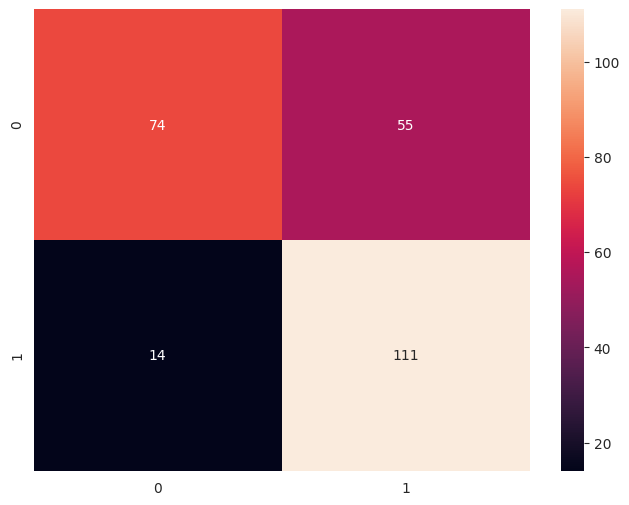

In [37]:
sns.heatmap(confusion_matrix(y_test,y_hat), annot=True, fmt='.0f')
plt.show()

Support Vector Machine

In [38]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_hat=svc.predict(x_test)

In [39]:
accuracy.append(np.round(accuracy_score(y_test,y_hat),2))
f1.append(np.round(f1_score(y_test,y_hat,average='weighted'),2))
model.append('SVC')

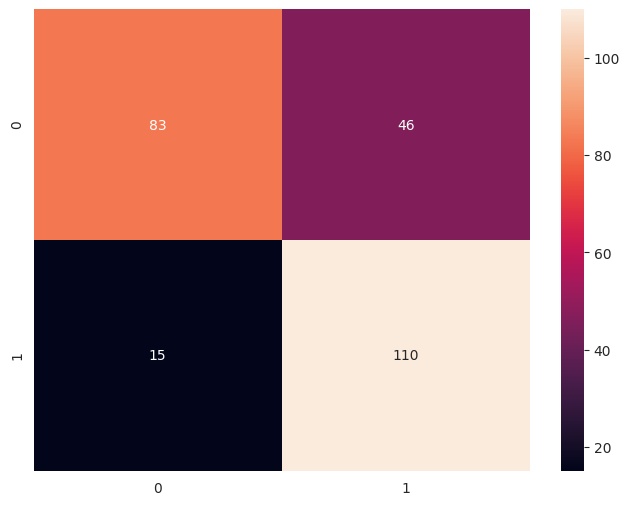

In [40]:
sns.heatmap(confusion_matrix(y_test,y_hat),annot=True, fmt='.0f')
plt.show()

Decision Tree Classifier

In [41]:
from sklearn.tree import DecisionTreeClassifier
dst = DecisionTreeClassifier(criterion='entropy')
dst.fit(x_train,y_train)
y_hat = dst.predict(x_test)

In [42]:
accuracy.append(np.round(accuracy_score(y_test,y_hat),2))
f1.append(np.round(f1_score(y_test,y_hat,average='weighted'),2))
model.append('Decision Tree')

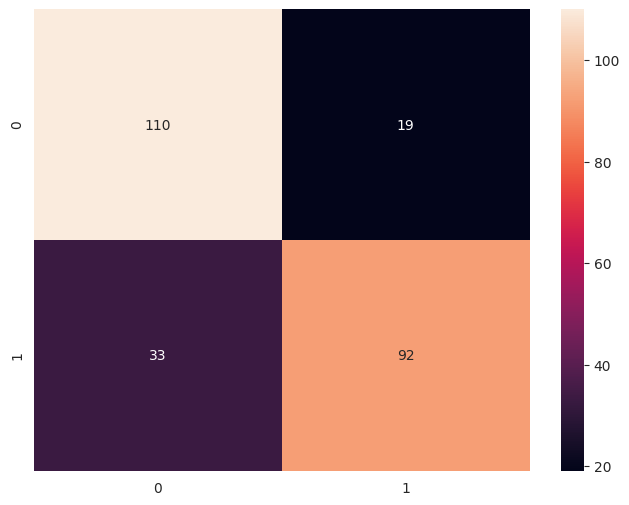

In [43]:
sns.heatmap(confusion_matrix(y_test,y_hat), annot=True, fmt='.0f')
plt.show()

Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_hat=rfc.predict(x_test)

In [45]:
accuracy.append(np.round(accuracy_score(y_test,y_hat),2))
f1.append(np.round(f1_score(y_test,y_hat,average='weighted'),2))
model.append('Random Forest')

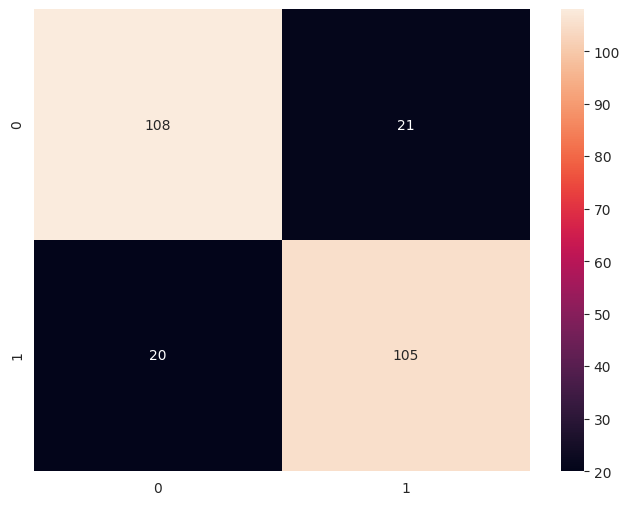

In [46]:
sns.heatmap(confusion_matrix(y_test,y_hat), annot=True, fmt='.0f')
plt.show()

XGBClassifer

In [47]:
from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators=100,max_depth=3)
xgb.fit(x_train,y_train)
y_hat=xgb.predict(x_test)

[16:17:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [48]:
accuracy.append(np.round(accuracy_score(y_test,y_hat),2))
f1.append(np.round(f1_score(y_test,y_hat,average='weighted'),2))
model.append('Xgboost')

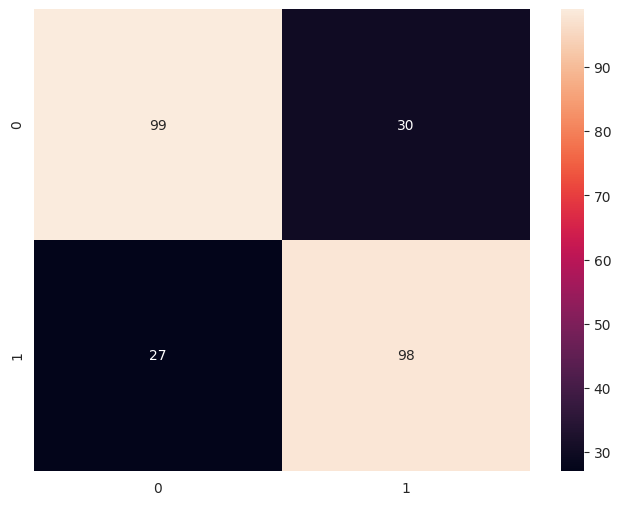

In [49]:
sns.heatmap(confusion_matrix(y_test,y_hat), annot=True, fmt='.0f')
plt.show()

In [50]:
model

['Logistic Regression', 'SVC', 'Decision Tree', 'Random Forest', 'Xgboost']

In [51]:
output = pd.DataFrame({
    'Model': model,
    'Accuracy':accuracy,
    'F1 score': f1
})

In [52]:
output

,Model,Accuracy,F1 score
0,Logistic Regression,0.73,0.72
1,SVC,0.76,0.76
2,Decision Tree,0.80,0.79
3,Random Forest,0.84,0.84
4,Xgboost,0.78,0.78


In [53]:
# y_pred = svc.predict(loan_test_norm)
# y_pred[0:5]


In [54]:
y_pred = rfc.predict(loan_test_norm)
y_pred[0:5]

result = pd.DataFrame({
    'LoanID': loan_test_id,
    'Loan_Status':y_pred
})
result

file_name = 'LoanPrediction3.xlsx'
result.to_excel(file_name)

Topsis Method

Application of Topsis Method

Convert Arrays to matrix

In [55]:
import numpy as np
matrix = np.asmatrix(loan_test_norm)
# matrix

In [56]:
model_weight

Gender               0.022813
Married              0.024441
Dependents           0.068167
Education            0.023447
Self_Employed        0.022300
ApplicantIncome      0.178229
CoapplicantIncome    0.125157
LoanAmount           0.175267
Loan_Amount_Term     0.041461
Credit_History       0.253346
Property_Area        0.065374
dtype: float64

In [57]:
objectives = [min,min,min,min,min,max,max,max,min,max,min]
print(objectives)

[<built-in function min>, <built-in function min>, <built-in function min>, <built-in function min>, <built-in function min>, <built-in function max>, <built-in function max>, <built-in function max>, <built-in function min>, <built-in function max>, <built-in function min>]


In [58]:
import skcriteria as skc

dm = skc.mkdm(
    matrix,
    objectives,
    weights=model_weight,
    alternatives = loan_mcdm_id,
    criteria = criterial
)
# dm_table= pd.DataFrame(eval(dm))
# dm_table.head()
# dm_matrix = np.matrix(dm)
# dm_table = pd.DataFrame(dm_matrix)
# dm_table.to_excel("dm_table.xlsx") 

In [59]:
dm

Gender[▼ 0.022813] Married[▼ 0.024441] Dependents[▼ 0.068167] Education[▼ 0.023447] Self_Employed[▼ 0.022300] ApplicantIncome[▲ 0.178229] CoapplicantIncome[▲ 0.125157] LoanAmount[▲ 0.175267] Loan_Amount_Term[▼ 0.041461] Credit_History[▲ 0.253346] Property_Area[▼ 0.065374]
LP001015           0.485479            0.758358              -0.758222             -0.544812                 -0.334845                    0.186461                     -0.673335              -0.426780                     0.306776                   0.437674                  1.118764
LP001022           0.485479            0.758358               0.181871             -0.544812                 -0.334845                   -0.352692                     -0.029848              -0.163953                     0.306776                   0.437674                  1.118764
LP001031           0.485479            0.758358               1.121964             -0.544812                 -0.334845                    0.039641                      0.098849               1.183033                     0.306776                   0.437674                  1.118764
LP001035           0.485479            0.758358               1.121964             -0.544812                 -0.334845                   -0.502774                      0.418877              -0.591047                     0.306776                   0.437674                  1.118764
LP001051           0.485479           -1.318638              -0.758222              1.835497                 -0.334845                   -0.311909                     -0.673335              -0.952433                     0.306776                   0.437674                  1.118764
LP001054           0.485479            0.758358              -0.758222              1.835497                  2.986456                   -0.538459                      0.794673               0.263140                     0.306776                   0.437674                  1.118764
LP001055          -2.059820           -1.318638               0.181871              1.835497                 -0.334845                   -0.526020                     -0.673335              -1.264540                     0.306776                   0.437674                 -0.095989
LP001056           0.485479            0.758358               1.121964              1.835497                 -0.334845                   -0.188540                     -0.673335               0.181007                     0.306776                  -2.284806                 -1.310741
LP001059           0.485479            0.758358               1.121964             -0.544812                 -0.334845                    1.800044                     -0.673335               2.365753                    -1.752740                   0.437674                  1.118764
LP001067           0.485479           -1.318638              -0.758222              1.835497                 -0.334845                   -0.490539                      0.356244              -0.213233                     0.306776                   0.437674                 -0.095989
LP001078           0.485479           -1.318638              -0.758222              1.835497                 -0.334845                   -0.349634                     -0.673335              -0.755313                     0.306776                   0.437674                  1.118764
LP001082           0.485479            0.758358               0.181871             -0.544812                 -0.334845                   -0.534381                     -0.022984               0.427407                     0.306776                   0.437674                 -0.095989
LP001083           0.485479           -1.318638               2.062056             -0.544812                 -0.334845                   -0.130424                     -0.673335              -1.576646                    -2.439246                   0.437674                  1.118764
LP001094           0.485479            0.758358              

In [60]:
# dm.weights
# weight_matrix = np.matrix(dm.weights)
# dm_weight = pd.DataFrame(weight_matrix)
# dm_weight.to_excel("dm_weight.xlsx")
# dm_weight

In [61]:
# scaler = scalers.SumScaler(target='both')
# dmt = scaler.transform(dm)
# dmt

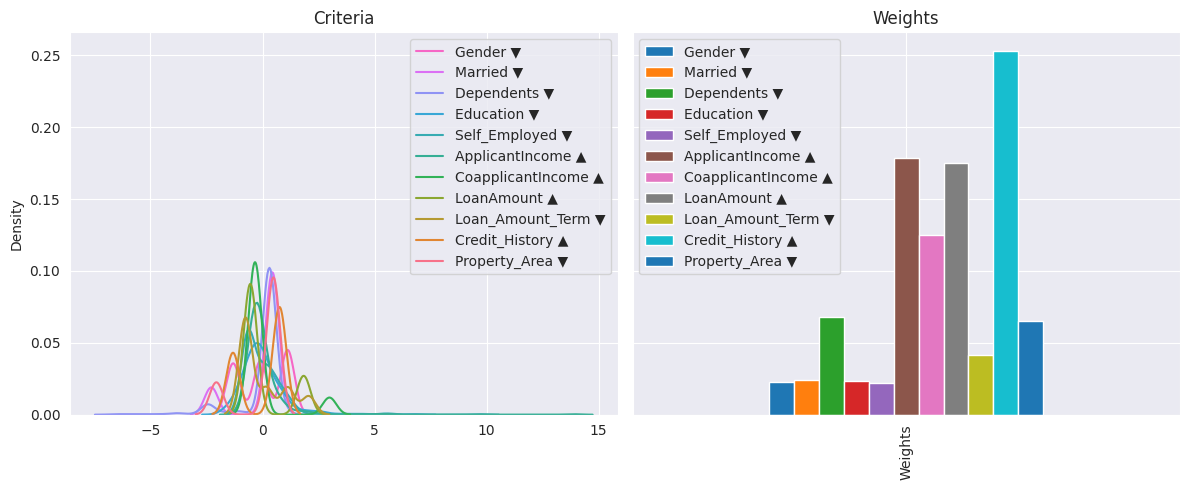

In [62]:
import matplotlib.pyplot as plt
# we create 2 axis with the same y axis
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
# in the first axis we plot the criteria KDE
dm.plot.kde(ax=axs[0])
axs[0].set_title("Criteria")
dm.plot.wbar(ax=axs[1])
axs[1].set_title("Weights")
# adjust the layout of the figute based on the content
fig.tight_layout()
plt.show()

In [63]:
from skcriteria.madm import similarity # here lives TOPSIS
from skcriteria.pipeline import mkpipe 
from skcriteria.preprocessing import invert_objectives, scalers

pipe = mkpipe(invert_objectives.MinimizeToMaximize(), # this scaler transform the matrix
scalers.VectorScaler(target="matrix"),
scalers.SumScaler(target="weights"),#  # and this transform the weights
similarity.TOPSIS(),)
pipe

SKCPipeline(steps=[('minimizetomaximize', MinimizeToMaximize()), ('vectorscaler', VectorScaler(target='matrix')), ('sumscaler', SumScaler(target='weights')), ('topsis', TOPSIS())])

In [64]:
rank = pipe.evaluate(dm)
rank

,LP001015,LP001022,LP001031,LP001035,LP001051,LP001054,LP001055,LP001056,LP001059,LP001067,LP001078,LP001082,LP001083,LP001094,LP001096,LP001099,LP001105,LP001107,LP001108,LP001115,LP001121,LP001124,LP001128,LP001135,LP001149,LP001153,LP001163,LP001169,LP001174,LP001176,LP001177,LP001183,LP001185,LP001187,LP001190,LP001203,LP001208,LP001210,LP001211,LP001219,LP001220,LP001221,LP001226,LP001230,LP001231,LP001232,LP001237,LP001242,LP001268,LP001270,LP001284,LP001287,LP001291,LP001298,LP001312,LP001313,LP001317,LP001321,LP001323,LP001324,LP001332,LP001335,LP001338,LP001347,LP001348,LP001351,LP001352,LP001358,LP001359,LP001361,LP001366,LP001368,LP001375,LP001380,LP001386,LP001400,LP001407,LP001413,LP001415,LP001419,LP001420,LP001428,LP001445,LP001446,LP001450,LP001452,LP001455,LP001466,LP001471,LP001472,LP001475,LP001483,LP001486,LP001490,LP001496,LP001499,LP001500,LP001501,LP001517,LP001527,LP001534,LP001542,LP001547,LP001548,LP001558,LP001561,LP001563,LP001567,LP001568,LP001573,LP001584,LP001587,LP001589,LP001591,LP001599,LP001601,LP001607,LP001611,LP001613,LP001622,LP001627,LP001650,LP001651,LP001652,LP001655,LP001660,LP001662,LP001663,LP001667,LP001695,LP001703,LP001718,LP001728,LP001735,LP001737,LP001739,LP001742,LP001757,LP001769,LP001771,LP001785,LP001787,LP001789,LP001791,LP001794,LP001797,LP001815,LP001817,LP001818,LP001822,LP001827,LP001831,LP001842,LP001853,LP001855,LP001857,LP001862,LP001867,LP001878,LP001881,LP001886,LP001906,LP001909,LP001911,LP001921,LP001923,LP001933,LP001943,LP001950,LP001959,LP001961,LP001973,LP001975,LP001979,LP001995,LP001999,LP002007,LP002009,LP002016,LP002017,LP002018,LP002027,LP002028,LP002042,LP002045,LP002046,LP002047,LP002056,LP002057,LP002059,LP002062,LP002064,LP002069,LP002070,LP002077,LP002083,LP002090,LP002096,LP002099,LP002102,LP002105,LP002107,LP002111,LP002117,LP002118,LP002123,LP002125,LP002148,LP002152,LP002165,LP002167,LP002168,LP002172,LP002176,LP002183,LP002184,LP002186,LP002192,LP002195,LP002208,LP002212,LP002240,LP002245,LP002253,LP002256,LP002257,LP002264,LP002270,LP002279,LP002286,LP002294,LP002298,LP002306,LP002310,LP002311,LP002316,LP002321,LP002325,LP002326,LP002329,LP002333,LP002339,LP002344,LP002346,LP002354,LP002355,LP002358,LP002360,LP002375,LP002376,LP002383,LP002385,LP002389,LP002394,LP002397,LP002399,LP002400,LP002402,LP002412,LP002415,LP002417,LP002420,LP002425,LP002433,LP002440,LP002441,LP002442,LP002445,LP002450,LP002471,LP002476,LP002482,LP002485,LP002495,LP002496,LP002523,LP002542,LP002550,LP002551,LP002553,LP002554,LP002561,LP002566,LP002568,LP002570,LP002572,LP002581,LP002584,LP002592,LP002593,LP002599,LP002604,LP002605,LP002609,LP002610,LP002612,LP002614,LP002630,LP002635,LP002639,LP002644,LP002651,LP002654,LP002657,LP002711,LP002712,LP002721,LP002735,LP002744,LP002745,LP002746,LP002747,LP002754,LP002759,LP002760,LP002766,LP002769,LP002774,LP002775,LP002781,LP002782,LP002786,LP002790,LP002791,LP002793,LP002802,LP002803,LP002805,LP002806,LP002816,LP002823,LP002825,LP002826,LP002843,LP002849,LP002850,LP002853,LP002856,LP002857,LP002858,LP002860,LP002867,LP002869,LP002870,LP002876,LP002878,LP002879,LP002885,LP002890,LP002891,LP002899,LP002901,LP002907,LP002920,LP002921,LP002932,LP002935,LP002952,LP002954,LP002962,LP002965,LP002969,LP002971,LP002975,LP002980,LP002986,LP002989
Rank,178,151,43,227,282,106,290,335,13,210,268,103,296,311,197,105,44,207,10,256,273,309,238,198,16,11,128,17,295,185,302,50,143,97,241,326,34,240,162,149,190,232,279,41,267,55,90,253,40,47,161,215,76,287,218,347,175,133,319,260,248,109,71,360,174,137,344,349,53,316,274,286,104,35,88,83,70,255,102,48,324,1,334,25,346,60,152,280,269,59,164,7,58,211,333,176,26,127,119,57,173,357,169,303,250,69,353,191,159,82,228,263,257,168,66,75,122,351,356,314,291,110,157,313,29,208,354,30,293,239,192,194,189,226,266,187,129,154,236,251,331,212,325,2,19,32,283,312,116,95,62,220,123,337,261,221,33,145,45,77,37,367,170,300,222,330,350,134,361,246,231,166,125,327,355,61,148,298,124,20,89,79,209,56,46,171,11